In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [10]:
iris = load_iris()

X = iris.data
y = iris.target

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 8)

model = SVC(gamma='scale')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9473684210526315


In [13]:
#uso 10 come numero di fold
scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print(scores)

[1.         0.93333333 1.         1.         1.         0.93333333
 0.93333333 0.93333333 1.         1.        ]


In [14]:
print(scores.mean())

0.9733333333333334


In [25]:
#cerco un valore ottimale dell'iperparametro C
import numpy

k_range = list(numpy.arange(0.1, 1.0, 0.1))
k_scores = []
for k in k_range:
    model = SVC(gamma='scale', C=k)
    scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.9333333333333333, 0.9400000000000001, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334, 0.9666666666666666, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334]


Text(0, 0.5, 'Accuratezza della cross-validation')

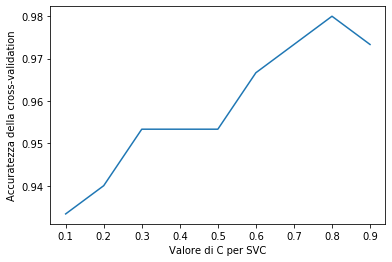

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

# visualizzo mediante un grafico
plt.plot(k_range, k_scores)
plt.xlabel('Valore di C per SVC')
plt.ylabel('Accuratezza della cross-validation')

In [27]:
#Noto che per C=0.8 ho il valore di accuratezza migliore

In [30]:
model = SVC(gamma='scale', C=0.8)
print(cross_val_score(model, X, y, cv=10, scoring='accuracy').mean())

0.9800000000000001
